# ECS7024 Statistics for Artificial Intelligence and Data Science

# Coursework 4 - Part 2

## Additional Analysis of the Storks Data [50 Marks]

## Contents Page

1. Section 1: Introduction
  * Section 1.1: Outline
  * Section 1.2: Loading the Data
2. Section 2: Analysis 1 - Birth Rate
  * Section 2.1: Regression Model 1
  * Section 2.2: Regression Model 2
  * Section 2.3: Bootstrap for the difference r2 between the models. 
3. Section 3: Analysis 2 - Number Of Storks
  * Section 3.1: Regression Model 1
  * Section 3.2: Regression Model 2
  * Section 3.3: Bootstrap for the difference RMSE between the models. 

## Section 1: Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.utils import resample

%matplotlib inline

#### The Bootstrap technique (What is bootstrap and how does it work?)

* Bootstrap is essentially a method of creating confidence intervals through creating samples from the original population. This allows us to estimate a confidence level of our statistic we are investigating and makes our testing more robust

* We take a sample from the data and add it to the main data to increase the size. does this at random so everytine u do this u get different metrics and dataset.

* In bootstrap we make the population a sample of the hypothetical population and we retrial this with different values of the original dataset for example 10 values, then added to the original dataset which is now the 'sample'. 

* We set a number of n to resample for example 500 which will give us 500 different regressions in this case we can then use and compare these 'samples' to check on robustness of our test and see any variation within the samples for example the mean and standard deviation.

### Section 1.1: Outline

Section 1 is the intro which loads the data. Section 2 we begin data preparation. Section 3 we analyse the trends in prices. In Section 4 we calculate the price changes, Section 5 we carry out statistical analysis and hypothesis testing.

### Section 1.2: Loading the data
The data is loaded from a CSV file. 

In [2]:
data_storks = pd.read_csv('storks.csv')
# data_storks = data_storks.rename(columns={'Humans': 'Humans (10^6)'})
data_storks

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3.2,83,55.68
1,Austria,83860,300,7.6,87,38.34
2,Belgium,30520,1,9.9,118,65.93
3,Bulgaria,111000,5000,9.0,117,57.99
4,Denmark,43100,9,5.1,59,81.46
5,France,544000,140,56.0,774,58.47
6,Germany,357000,3300,78.0,901,59.81
7,Greece,132000,2500,10.0,106,47.31
8,Holland,41900,4,15.0,188,70.96
9,Hungary,93000,5000,11.0,124,75.86


## Section 2: Analysis 1 - Birth Rate

The aim of this analysis is to compare two regression models to explain the variability of the number of births.

### Section 2.1:  Regression Model 1 

Models the predictor Number of storks with the target variable birth rate

In [3]:
# Births and storks

y = data_storks.BirthRate # this is the target variable; we assue just one though more are possible
X = np.column_stack([data_storks.Storks])

reg = LinearRegression().fit(X, y)

print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))
print('The intercept is %4.1f' % reg.intercept_)
beta_Storks = reg.coef_
print('Estimated regression coefficient for Storks is %4.2f\n' % beta_Storks)
print('Regression equation: y = 0.03x + 225')

The R2 coefficient of determination is 0.385
The intercept is 225.0
Estimated regression coefficient for Storks is 0.03

Regression equation: y = 0.03x + 225


In [4]:
y_hat = reg.predict(X)

Text(0, 0.5, 'Birth Rate')

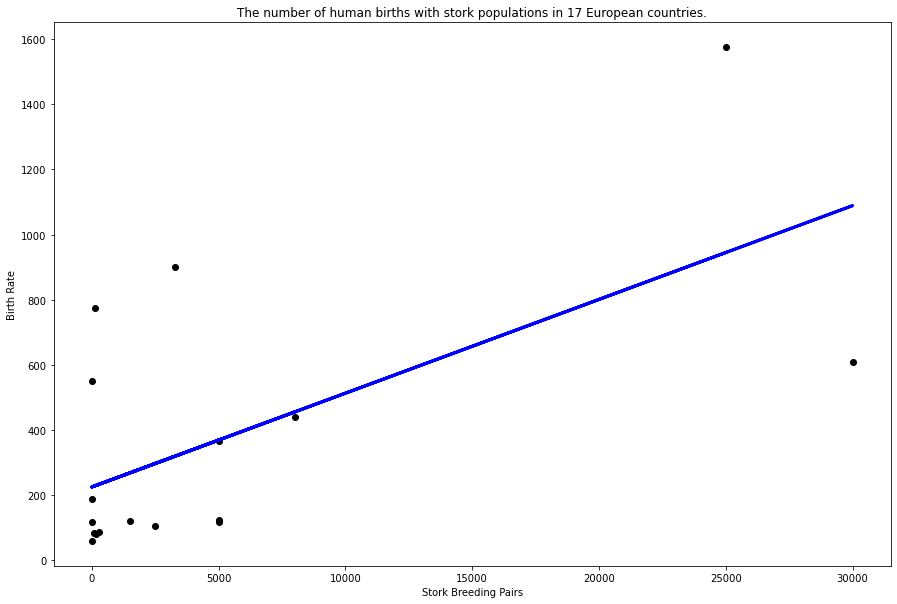

In [5]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(X, y,  color='black')
a.plot(X, y_hat, color='blue', linewidth=3)

a.set_title('The number of human births with stork populations in 17 European countries.')
a.set_xlabel('Stork Breeding Pairs')
a.set_ylabel('Birth Rate')

#### Explaining the plots and metrics model 1

This scatter plot shows the relationship between birth rate and stork pairs. We can see from the plot that the predictor variable storks is not very good at predicting the birth rate. However we can see a positive correlation which may imply some sort of association. As we do not know of any clear confounders we can't identify if this is causation or just association.

The r2 is the explained variation in our model over the total variation as a ratio. Our scatter plot shows us the data is not fitted very closely to the regression line from the visual plot. This is further backed up with a moderately low r2 of 0.385. r2 measures the correlation and goodness of fit and this isn't very high. This means the predictor and target relationship shows the model isn't great however there seems to be some sort of association. Generally a r2 of 0.4 or above is considered a good fit.

### Section 2.2:  Regression Model 2 

Models the predictor Humans (Population size) with the target variable birth rate

In [6]:
# Births and Humamns

y1 = data_storks.BirthRate # this is the target variable; we assue just one though more are possible
X1 = np.column_stack([data_storks.Humans])

X1

reg1 = LinearRegression().fit(X1, y1)

print('The R2 coefficient of determination is %4.3f' % reg1.score(X1, y1))
print('The intercept is %4.1f' % reg1.intercept_)
beta_Humans = reg1.coef_
print('Estimated regression coefficient for Humans is %4.2f\n' % beta_Humans)
print('Regression equation: y1 = 14.83x1 - 8.4')

The R2 coefficient of determination is 0.725
The intercept is -8.4
Estimated regression coefficient for Humans is 14.83

Regression equation: y1 = 14.83x1 - 8.4


In [7]:
y1_hat = reg1.predict(X1)

Text(0, 0.5, 'Birth Rate')

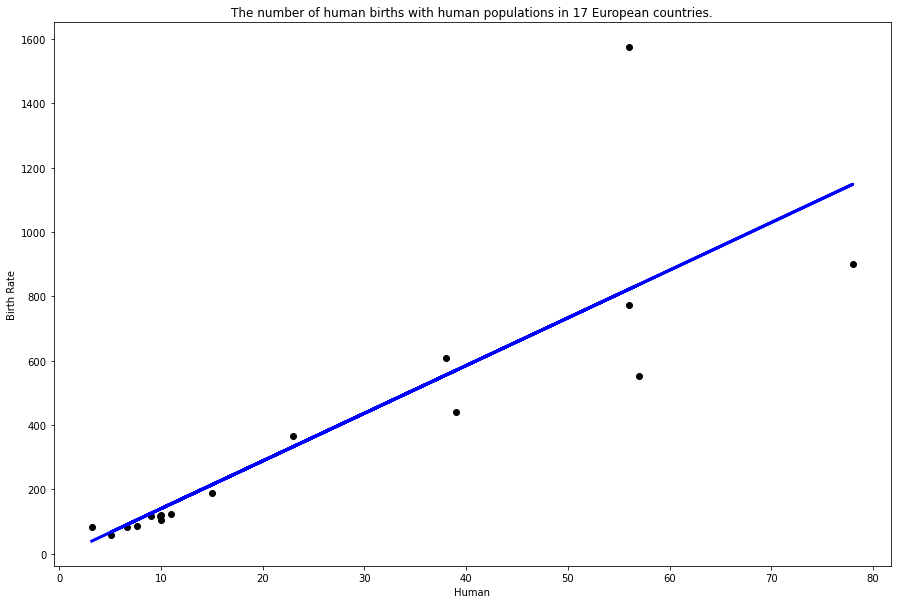

In [8]:
# Plot outputs
fig, a1 = plt.subplots(1,1,figsize=(15,10))
a1.scatter(X1, y1,  color='black')
a1.plot(X1, y1_hat, color='blue', linewidth=3)

a1.set_title('The number of human births with human populations in 17 European countries.')
a1.set_xlabel('Human')
a1.set_ylabel('Birth Rate')

#### Explaining the plots and metrics model 2 

This scatter plot shows the relationship between birth rate and humans. We can see from the plot that the predictor variable humans is good at predicting the birth rate. We can see a positive correlation on the visualisation of the model and a close fit of the regression line to the data which shows this is a good predictor of birth rate.

This is further backed up by a high r2 of 0.725. This value means that the model has a good fit and a high correlation between variables. This model has a high amount of explained variance and will be good at predicting as we can see the actual and predicted values are not too far off. Overall from the initial comparison, we can see that model 2 is a better fit for the data than model 1. We will compare the difference in r2 to see if the difference in variability is significant or not.

### Section 2.3: Bootstrap for the difference r2 between the models. 

Bootstrap for the distribution of the difference in the r2 parameter for the two models.

In [9]:
def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(0, repeats):
        result.iloc[i] = func(resample(data)) # default is to resample, same size
    return result

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def doRegression(data_storks) :
    y = data_storks.BirthRate # this is the target variable; we assue just one though more are possible
    X = np.column_stack([data_storks.Storks])
    y1 = data_storks.BirthRate # this is the target variable; we assue just one though more are possible
    X1 = np.column_stack([data_storks.Humans])
    reg = LinearRegression().fit(X, y)
    reg1 = LinearRegression().fit(X1, y1)
    beta_Storks = reg.coef_[0]
    beta_Humans = reg1.coef_[0]
    return [reg.intercept_, beta_Storks, reg.score(X, y), reg1.intercept_,beta_Humans,reg1.score(X1,y1)] 

bstrap = bootstrapC(data_storks, ['Intercept', 'BetaStorks', 'Storks_R2', 'humans Intercept', 
                                  'BetaHumans', 'Humans_R2'], 500, doRegression) 

bstrap.round(2)

,Intercept,BetaStorks,Storks_R2,humans Intercept,BetaHumans,Humans_R2
0,128.97,0.05,0.54,-61.44,19.53,0.83
1,179.15,0.04,0.56,-38.31,18.93,0.76
2,323.14,0.02,0.22,-21.90,15.29,0.71
3,193.80,0.05,0.51,-17.83,16.03,0.77
4,125.00,0.02,0.67,8.28,12.59,0.89
...,...,...,...,...,...,...
495,167.95,0.04,0.56,-26.31,18.74,0.77
496,379.90,0.03,0.39,-70.53,18.61,0.60
497,260.67,0.02,0.35,35.32,13.44,0.76
498,109.57,0.06,0.84,-73.77,18.75,0.66


In [11]:
bstrap = bstrap.drop(['Intercept','humans Intercept'],axis=1)

In [12]:
bstrap = bstrap.assign(R2_Difference = bstrap.Humans_R2 - bstrap.Storks_R2)
bstrap.round(2)

,BetaStorks,Storks_R2,BetaHumans,Humans_R2,R2_Difference
0,0.05,0.54,19.53,0.83,0.29
1,0.04,0.56,18.93,0.76,0.20
2,0.02,0.22,15.29,0.71,0.49
3,0.05,0.51,16.03,0.77,0.26
4,0.02,0.67,12.59,0.89,0.22
...,...,...,...,...,...
495,0.04,0.56,18.74,0.77,0.21
496,0.03,0.39,18.61,0.60,0.21
497,0.02,0.35,13.44,0.76,0.40
498,0.06,0.84,18.75,0.66,-0.18


<AxesSubplot:>

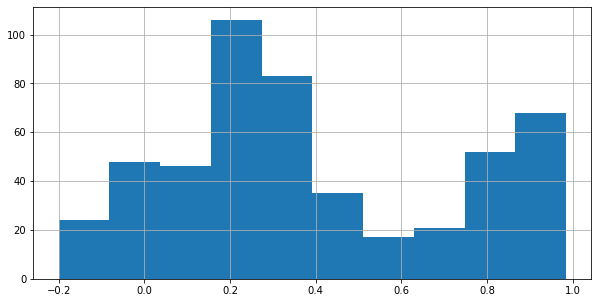

In [13]:
bstrap['R2_Difference'].hist(figsize=(10,5))

#### Estimate appropriate confidence intervals for the difference in the r2 values. 

In [14]:
print('The r2 difference is',(reg1.score(X1, y1) - reg.score(X, y)).round(3),'\n')

print('The 90%% CI for the r2 difference is %4.3f to %4.3f' % 
      (bstrap.R2_Difference.quantile(0.05), bstrap.R2_Difference.quantile(0.95)),'\n')

print('The 99%% CI for the r2 difference is %4.3f to %4.3f' % 
      (bstrap.R2_Difference.quantile(0.005), bstrap.R2_Difference.quantile(0.995)))

The r2 difference is 0.34 

The 90% CI for the r2 difference is -0.078 to 0.931 

The 99% CI for the r2 difference is -0.157 to 0.978


#### Explain whether we can be confident that one of the models explains more of the variability in the number of births than the other model. 

The parameter we are testing is the r2. The r2 is responsible for telling us how much variance is explained by our model. We can compare the goodness of fit for our models via the r2 difference of the two models, to test if one explains more variability than the other on our target variable. The model with the higher r2 should be a better fit and have a stronger correlation with the dependent variable. Although one model may have a higher r2 than the other, we need to confirm whether this is statistically significant because this impacts whether we take the difference as meaningful.

The first step is to set our null hypothesis which is: one of the models explains more variability than the other model in the number of births. The difference in r2 between the two models (our parameter) would have to be impressive enough using the confidence intervals as a reference. If it is indeed impressive than we deem it to be statistically significant and we conclude that one model does not explain more of the variability in the number of births than the other model. If our parameter value lies in the CI, then we accept the null hypothesis.

Confidence intervals measure the margin of statistical error for our parameter. At the 99% confidence interval, we are sure that if we repeated the trial many times, the true value of our r2 difference would lie in this range 99% of the time. In only 1% of retrials, the true r2 value would not be in the population. This means our true value r2 of 0.34 would only be impressive (outside of our CI range) in 1% of cases. Although this shows high confidence and low error, there is a trade off. At the 99% level the width of the CI may be too large which means it can be seen as imprecise. At 90% confidence the width is smaller but we are less confident, however 90% is a high level of confidence.

Having zero in our CI range means we can not be sure whether there is an effect. There is a reasonable chance that the 
true value could be 0 and therefore there wouldn't be a difference and no model would be better than the other. We can only be truly confident one models r2 is better than the others if 0 doesn't lie in our range of CI. for the 99% and 90% CI this is the case.

In conclusion with the information available, we can not be confident that one of our models does explain more variability in the number of births than the other model at the 99% and 90% confidence interval. 

## Section 3: Analysis 2 - Number Of Storks

The aim of this analysis is to compare the performance of two regression models to predict the number of storks

### Section 3.1: Regression Model 1 

Models the predictor Land Area with the target variable Storks

In [15]:
# Storks and Land

y2 = data_storks.Storks # this is the target variable; we assue just one though more are possible
X2 = np.column_stack([data_storks.Area])

reg2 = LinearRegression().fit(X2, y2)

print('The R2 coefficient of determination is %4.3f' % reg2.score(X2, y2),'\n')
print('The intercept is %4.1f' % reg2.intercept_,'\n')
beta_Area = reg2.coef_
print('Estimated regression coefficient for Land Area is %4.2f\n' % beta_Area)
print('Regression equation: y2 = 0.02x1 - 60.7')

The R2 coefficient of determination is 0.336 

The intercept is -60.7 

Estimated regression coefficient for Land Area is 0.02

Regression equation: y2 = 0.02x1 - 60.7


In [16]:
y2_hat = reg2.predict(X2)

# The mean squared error
print('Root of the mean squared error: %.2f'% mean_squared_error(y2, y2_hat, squared=False))

Root of the mean squared error: 6984.77


Text(0, 0.5, 'Actual Value')

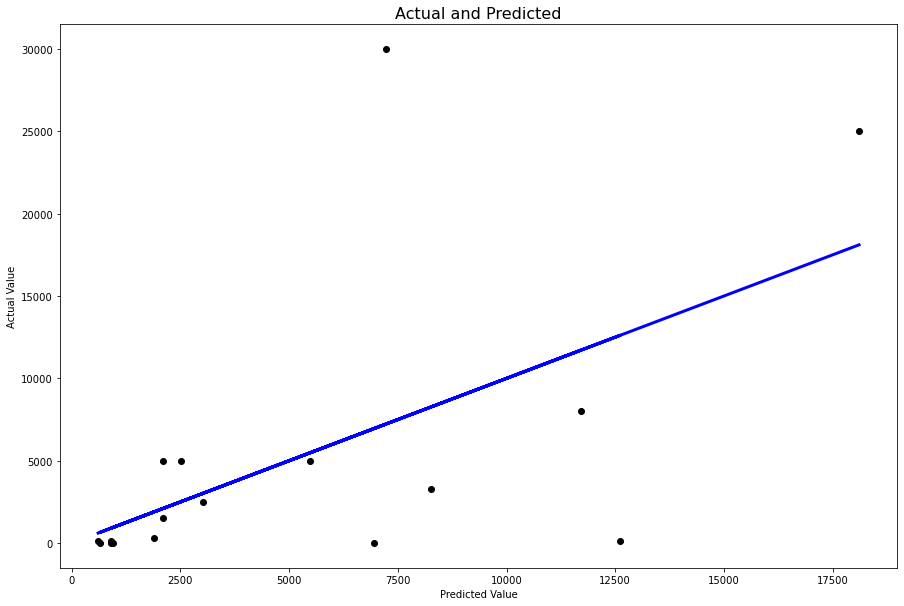

In [17]:
# Plot outputs
fig, a2 = plt.subplots(1,1,figsize=(15,10))
a2.scatter(y2_hat, y2,  color='black')
a2.plot(y2_hat, y2_hat, color='blue', linewidth=3)

a2.set_title('Actual and Predicted',fontsize=16)
a2.set_xlabel('Predicted Value')
a2.set_ylabel('Actual Value')

#### Explaining the plots and metrics model 1

This scatter plot shows the predicted and actual values between storks and Land area. We can see from the plot that the predictor variable Land area looks okay at predicting the number stork pairs but not great. We can see a positive correlation on the visualisation with some outliers which largely impact the accuracy of the model most likely.

The RMSE is a value of 6984 which is all relative to the units we are using, however we can see quite large errors between some actual and predicted values which contribute to the relatively high RMSE. We can say from the initial plots and metrics that land area is an okay fit or moderately bad fit and the r2 of 0.336 backs this up. we look for an r2 of above 0.4 to say it is a decent fit but the outliers seem to be an issue in this model.

### Section 3.2: Regression Model 2 

Models the predictors population density and suitable area percentage with the target variable Storks

In [18]:
def calcProportion(data_storks):
    humans = ((data_storks.Humans)*10**6)
    return humans / data_storks.Area

data_storks = data_storks.assign(PopulationDensity = data_storks.apply(calcProportion, axis=1)) 

data_storks['SuitableArea'] = ((data_storks.SuitableAreaPercent / 100) * (data_storks.Area))
data_storks.round(2)

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent,PopulationDensity,SuitableArea
0,Albania,28750,100,3.2,83,55.68,111.30,16008.00
1,Austria,83860,300,7.6,87,38.34,90.63,32151.92
2,Belgium,30520,1,9.9,118,65.93,324.38,20121.84
3,Bulgaria,111000,5000,9.0,117,57.99,81.08,64368.90
4,Denmark,43100,9,5.1,59,81.46,118.33,35109.26
5,France,544000,140,56.0,774,58.47,102.94,318076.80
6,Germany,357000,3300,78.0,901,59.81,218.49,213521.70
7,Greece,132000,2500,10.0,106,47.31,75.76,62449.20
8,Holland,41900,4,15.0,188,70.96,358.00,29732.24
9,Hungary,93000,5000,11.0,124,75.86,118.28,70549.80


In [19]:
# Storks, population density, area of suitable land

y3 = data_storks.Storks # this is the target variable; we assue just one though more are possible
X3 = np.column_stack((data_storks.PopulationDensity, data_storks.SuitableArea))

reg3 = LinearRegression().fit(X3, y3)

print('The R2 coefficient of determination is %4.3f' % reg3.score(X3, y3),'\n')
print('The intercept is %4.1f\n' % reg3.intercept_)
beta_PopulationDensity, beta_SuitableArea = reg3.coef_
print('Estimated regression coefficient for Population Density is %4.2f\n' % beta_PopulationDensity)
print('Estimated regression coefficient for Suitable Area is %4.3f\n' % beta_SuitableArea)

print('Regression equation: y3 = -12.13x1 + 0.037x2 + 1881.4')

The R2 coefficient of determination is 0.393 

The intercept is 1881.4

Estimated regression coefficient for Population Density is -12.13

Estimated regression coefficient for Suitable Area is 0.037

Regression equation: y3 = -12.13x1 + 0.037x2 + 1881.4


In [20]:
y3_hat = reg3.predict(X3)

# The mean squared error
print('Root of the mean squared error: %.2f'% mean_squared_error(y3, y3_hat, squared=False))

Root of the mean squared error: 6677.03


Text(0, 0.5, 'Actual Value')

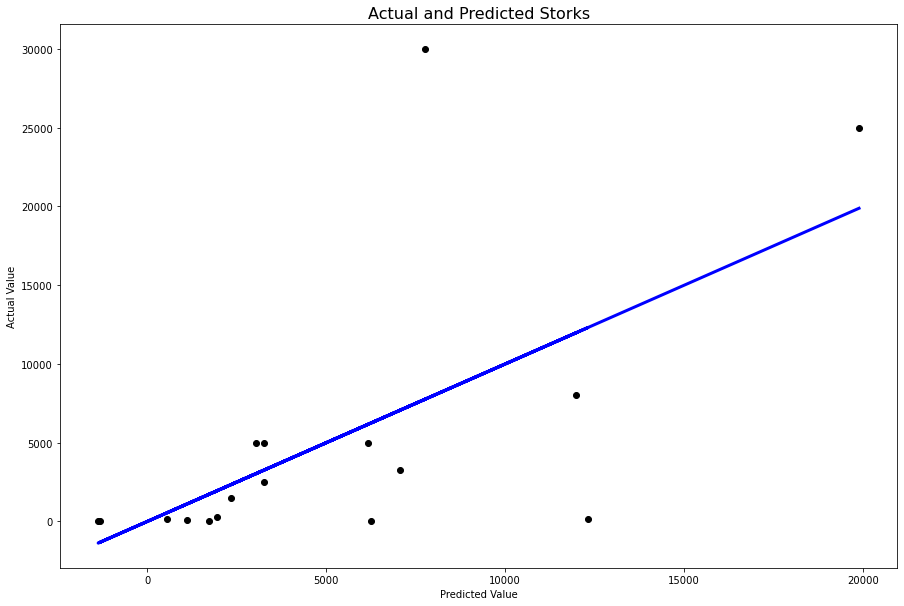

In [21]:
# Plot outputs
fig, a3 = plt.subplots(1,1,figsize=(15,10))
a3.scatter(y3_hat, y3,  color='black')
a3.plot(y3_hat, y3_hat, color='blue', linewidth=3)

a3.set_title('Actual and Predicted Storks',fontsize=16)
a3.set_xlabel('Predicted Value')
a3.set_ylabel('Actual Value')

#### Explaining the plots and metrics model 2

This scatter plot shows the predicted and actual values between storks and the two predictors suitable land area and population density. We can see a positive correlation on the visualisation with some outliers which largely impact the accuracy of the model most likely. The predictors don't seem like they are very good at predicting storks but the model seems better than model 1 which is expected with more predictors.

This model is not much better fit than the previous model with an r2 of 0.393 which is slightly higher but still under our threshold value of 0.4 as a good fit for the data. We can say the model 2 has a slight positive correlation but it is not a good fit for the data and this is backed up by the high RMSE of 6677 which is also slightly lower than model 1. From these initial results we would expect model 2 to perform better and predict better than model 1, however the difference may not be significant enough to conclude this.

### Section 3.3: : Bootstrap for the difference RMSE between the models. 

Use the bootstrap technique to estimate the difference in the root mean squared error (RMSE) between the predicted and actual values for the two models 

In [22]:
print('RMSE_model_1 =', mean_squared_error(y2, y2_hat, squared=False),'\n')
print('RMSE_model_2 =', mean_squared_error(y3, y3_hat, squared=False),'\n')

print('RMSE_difference =', (mean_squared_error(y2, y2_hat, squared=False))- 
      mean_squared_error(y3, y3_hat, squared=False,))

RMSE_model_1 = 6984.766863832696 

RMSE_model_2 = 6677.0286930693765 

RMSE_difference = 307.73817076331943


In [23]:
def doRegression(data_storks) :
    y2 = data_storks.Storks # this is the target variable; we assue just one though more are possible
    X2 = np.column_stack([data_storks.Area])
    y3 = data_storks.Storks # this is the target variable; we assue just one though more are possible
    X3 = np.column_stack((data_storks.PopulationDensity, data_storks.SuitableArea))
    reg2 = LinearRegression().fit(X2, y2)
    reg3 = LinearRegression().fit(X3, y3)
    beta_Area = reg2.coef_[0]
    beta_PopulationDensity, beta_SuitableArea = reg3.coef_
    return [beta_Area,beta_PopulationDensity,beta_SuitableArea,mean_squared_error(y2, y2_hat, squared=False),
            mean_squared_error(y3, y3_hat, squared=False)] 

bstrap2 = bootstrapC(data_storks, ['beta_Area','beta_PopulationDensity','beta_SuitableArea',
                                   'RMSE_Model_1','RMSE_Model_2'], 500, doRegression) 

bstrap2

,beta_Area,beta_PopulationDensity,beta_SuitableArea,RMSE_Model_1,RMSE_Model_2
0,0.007490,-37.082018,0.024466,8598.670423,8743.667403
1,0.027339,-5.531803,0.041257,8246.734063,8496.470994
2,0.022455,-9.097945,0.034342,8354.929447,8901.691564
3,0.001663,-7.933872,0.001537,6890.282159,7090.886688
4,0.023379,-10.885513,0.036063,7328.269341,7502.806198
...,...,...,...,...,...
495,0.019757,-12.293750,0.030160,7643.472716,7834.149006
496,0.030170,-8.192148,0.044411,9162.312507,9290.073333
497,0.015207,-11.437908,0.025126,8964.688443,9325.894636
498,0.021009,-14.098745,0.032693,10295.807835,10606.686007


In [24]:
bstrap2 = bstrap2.assign(RMSE_Difference = bstrap2.RMSE_Model_1 - bstrap2.RMSE_Model_2)
bstrap2.round(2)

,beta_Area,beta_PopulationDensity,beta_SuitableArea,RMSE_Model_1,RMSE_Model_2,RMSE_Difference
0,0.01,-37.08,0.02,8598.67,8743.67,-145.00
1,0.03,-5.53,0.04,8246.73,8496.47,-249.74
2,0.02,-9.10,0.03,8354.93,8901.69,-546.76
3,0.00,-7.93,0.00,6890.28,7090.89,-200.60
4,0.02,-10.89,0.04,7328.27,7502.81,-174.54
...,...,...,...,...,...,...
495,0.02,-12.29,0.03,7643.47,7834.15,-190.68
496,0.03,-8.19,0.04,9162.31,9290.07,-127.76
497,0.02,-11.44,0.03,8964.69,9325.89,-361.21
498,0.02,-14.10,0.03,10295.81,10606.69,-310.88


Text(0.5, 1.0, 'RMSE Difference')

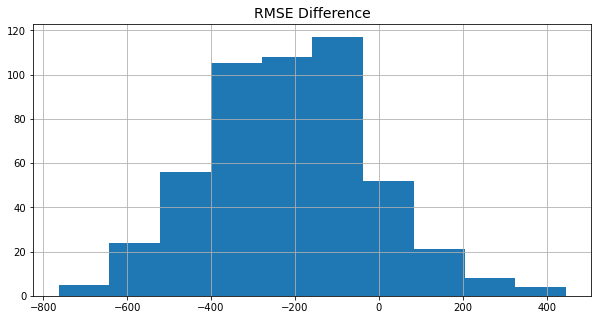

In [25]:
d = bstrap2['RMSE_Difference'].hist(figsize=(10,5))
d.set_title('RMSE Difference',fontsize=14)

#### Estimate appropriate confidence intervals for the difference in the RMSE values.

In [26]:
print('The RMSE difference is', ((mean_squared_error(y2, y2_hat, squared=False))- 
      mean_squared_error(y3, y3_hat, squared=False,)).round(2),'\n')

print('The 90%% CI range for the RMSE difference is %4.3f to %4.3f \n' % 
      (bstrap2.RMSE_Difference.quantile(0.05), bstrap2.RMSE_Difference.quantile(0.95)))

print('The 99%% CI range for the RMSE difference is %4.3f to %4.3f \n' % 
      (bstrap2.RMSE_Difference.quantile(0.005), bstrap2.RMSE_Difference.quantile(0.995)))

The RMSE difference is 307.74 

The 90% CI range for the RMSE difference is -541.138 to 107.198 

The 99% CI range for the RMSE difference is -675.797 to 328.571 



#### Explain whether we can be confident that one model predicts the number of storks better than the other model.

The parameter we are testing is the RMSE. The RMSE is responsible for telling us the error of the model, the difference between actual and predicted values. We can get an idea of how the model performs from this value and the model with the lower RMSE will perform better. Although one model may have a lower RMSE than the other, we need to confirm whether this is statistically significant because this impacts whether we take the difference as meaningful.

Our RMSE for model 1 is 6984.77 and for model 2 is 6677.03. we subtract model 2 from model 1 to get the difference of 307.74 and then we use this against the bootstrapped CI to test if this is a significant difference in RMSE between models or not. The first step is to set our null hypothesis which is: One model predicts the number of storks better than the other model. In other words, one model performs better than the other and the quality metric we are using is the error (RMSE).

Model 2 is the model with the lower RMSE of the two, so in theory predicts the number of storks better than model 2. However we need to test if this is a big enough difference to conclusively say and with confidence it is a better model at predictions. We would assume Model 2 is better because it has more predictors and is a more refined version of model 1 such as suitable land area rather than just land area. However, it is possible neither model is good at predicting and the initial r2 are not a big difference between them. 

At the 99% confidence interval we can see our RMSE difference value of 307.74 does fit in the CI range and we accept the null. At the 99% confidence interval, we are sure that if we repeated the trial many times, the true value of our r2 difference would lie in this range 99% of the time. However this RMSE difference is significant at both the 95% and 90% level and the value is impressive enough to warrant us to conclude that neither model predicts the number of storks better than the other. The null hypothesis is only accepted at 99% confidence which is a wide interval and not as precise. 

Having zero in our CI range means we can not be sure whether there is an effect. There is a reasonable chance that the 
true value could be 0 and therefore there wouldn't be a difference and no model would be better than the other. We can only be truly confident one models RMSE is better than the others if 0 doesn't lie in our range of CI. for the 99% and 90% CI this is the case.

In conclusion we will go with the 90% confidence interval as we deem it the most appropriate. It gives us more precision and we can therefore conclude the parameter result is statistically significant along with the fact 0 lies in our CI. Therefore we are not confident one model predicts number of storks better than the other model.